In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

base_path = ''

In [3]:
df = pd.read_csv(base_path + 'df1019_1.csv')

In [4]:
data = df.copy()
data

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류,소분류
0,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
1,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
2,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
3,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
4,2021-07-24,0,황도복숭아,1,5980,5980,7,5,과일,복숭아
...,...,...,...,...,...,...,...,...,...,...
13084836,2022-09-29,8809267390136,서라벌특란30구,1,7800,7800,9,3,두부/콩나물/계란,일반계란
13084837,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,일반계란
13084838,2022-09-30,8809267390136,서라벌특란30구,1,7800,7800,9,4,두부/콩나물/계란,일반계란
13084839,2022-09-30,8809267390136,서라벌특란30구,2,7800,15600,9,4,두부/콩나물/계란,일반계란


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [6]:
data1 = data[['GDS_NM', 'SALE_QTY', 'SALE_AMT']]
data1

,GDS_NM,SALE_QTY,SALE_AMT
0,황도복숭아,1,5980
1,황도복숭아,1,5980
2,황도복숭아,1,5980
3,황도복숭아,1,5980
4,황도복숭아,1,5980
...,...,...,...
13084836,서라벌특란30구,1,7800
13084837,서라벌특란30구,1,7800
13084838,서라벌특란30구,1,7800
13084839,서라벌특란30구,2,15600


In [7]:
data2 = data1.groupby('GDS_NM').mean()

In [8]:
display(data2.head())

,SALE_QTY,SALE_AMT
GDS_NM,,
1500악세서리잡화,1.215990,1823.984526
1500양말덧신,2.082944,3124.415888
1등급한우양지국거리,1.021134,11396.142036
21년산황금메뚜기쌀,1.323428,72416.977885
22년햅쌀경기미,1.807583,85174.976303


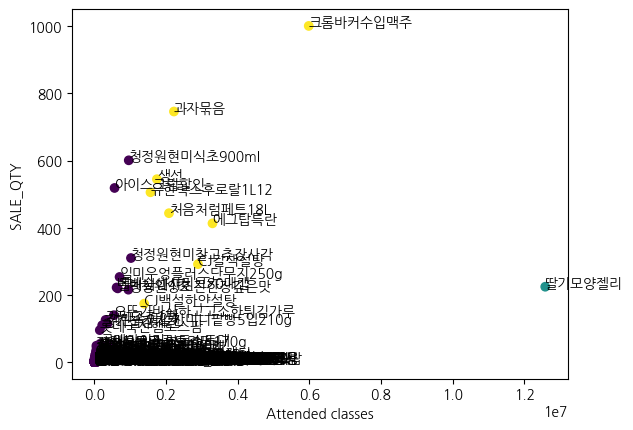

In [9]:
plt.rcParams['font.family'] = 'NanumGothic'
# k=3 클러스터 생성
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(data2)

# 플롯
plt.scatter(data2['SALE_AMT'], data2['SALE_QTY'], c=cluster_ids)
plt.xlabel("Attended classes")
plt.ylabel("SALE_QTY")

# 범례 달기
for GDS_NM, SALE_QTY, SALE_AMT in data2.itertuples():
    plt.annotate(GDS_NM, (SALE_AMT, SALE_QTY))
    
plt.show()

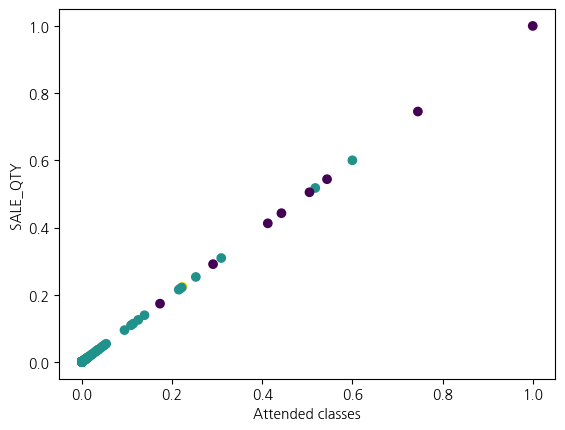

In [10]:
# normalizer 생성
min_max_scaler = preprocessing.MinMaxScaler()

# 표준화하기
data2[['SALE_QTY', 'SALE_QTY']] = min_max_scaler.fit_transform(data2[['SALE_QTY', 'SALE_QTY']])

# 클러스터링 생성
estimator = KMeans(n_clusters = 3)
cluster_ids = estimator.fit_predict(data2)


plt.scatter(data2['SALE_QTY'], data2['SALE_QTY'], c=cluster_ids)
plt.xlabel("Attended classes")
plt.ylabel("SALE_QTY")

for GDS_NM, SALE_QTY, SALE_QTY in data2.itertuples():
    plt.annotate(GDS_NM, (SALE_QTY, SALE_QTY))
    
plt.show()

In [11]:
data2 = data[['GDS_NM', 'SALE_QTY', 'SALE_AMT', 'month', 'weekday']]
data2

,GDS_NM,SALE_QTY,SALE_AMT,month,weekday
0,황도복숭아,1,5980,7,5
1,황도복숭아,1,5980,7,5
2,황도복숭아,1,5980,7,5
3,황도복숭아,1,5980,7,5
4,황도복숭아,1,5980,7,5
...,...,...,...,...,...
13084836,서라벌특란30구,1,7800,9,3
13084837,서라벌특란30구,1,7800,9,4
13084838,서라벌특란30구,1,7800,9,4
13084839,서라벌특란30구,2,15600,9,4


In [12]:
data3 = data2.copy()

In [13]:
display(data3.head())

,GDS_NM,SALE_QTY,SALE_AMT,month,weekday
0,황도복숭아,1,5980,7,5
1,황도복숭아,1,5980,7,5
2,황도복숭아,1,5980,7,5
3,황도복숭아,1,5980,7,5
4,황도복숭아,1,5980,7,5


In [14]:
processed_data = data3.copy()

In [15]:
# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['SALE_QTY', 'SALE_AMT']] = scaler.fit_transform(processed_data[['SALE_QTY', 'SALE_AMT']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [16]:
# K 값을 늘려가며 반복 테스트
for i in range(1, 7) :
       # 클러스터 생성
       estimator = KMeans(n_clusters = i)
       ids = estimator.fit_predict(processed_data[['SALE_QTY', 'SALE_AMT']])

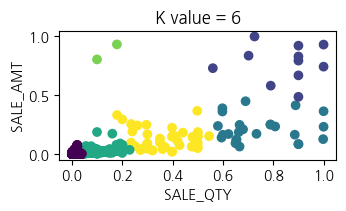

In [17]:
plt.subplot(3, 2, i)
plt.tight_layout()
        # 서브플롯의 라벨링
plt.title("K value = {}".format(i))
plt.xlabel('SALE_QTY')
plt.ylabel('SALE_AMT')
        # 클러스터링 그리기
plt.scatter(processed_data['SALE_QTY'], processed_data['SALE_AMT'], c=ids)  
plt.show()